In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

In [2]:
p = []
for y in range(2008, 2011):
    frame = pd.read_csv('data/x%d.txt' % y, names=['name', 'sex', 'births'])
    frame['year'] = y
    p.append(frame)

In [3]:
dfnames = pd.concat(p, ignore_index=True)
dfnames

,name,sex,births,year
0,Emma,F,18765,2008
1,Isabella,F,18564,2008
2,Emily,F,17397,2008
3,Olivia,F,17030,2008
4,Ava,F,17007,2008
...,...,...,...,...
103441,Zymaire,M,5,2010
103442,Zyonne,M,5,2010
103443,Zyquarius,M,5,2010
103444,Zyran,M,5,2010


In [32]:
tb = dfnames.pivot_table('births', index='year', columns='sex', aggfunc=sum)
tb     # tb : total_births

sex,F,M
year,,
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [5]:
def add_prop(g):
    g['prop'] = g.births / g.births.sum()
    return g

In [6]:
names = dfnames.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Emma,F,18765,2008,0.009962
1,Isabella,F,18564,2008,0.009855
2,Emily,F,17397,2008,0.009236
3,Olivia,F,17030,2008,0.009041
4,Ava,F,17007,2008,0.009029
...,...,...,...,...,...
103441,Zymaire,M,5,2010,0.000003
103442,Zyonne,M,5,2010,0.000003
103443,Zyquarius,M,5,2010,0.000003
103444,Zyran,M,5,2010,0.000003


In [9]:
names.groupby(['year', 'sex']).prop.max()

year  sex
2008  F      0.009962
      M      0.011075
2009  F      0.012159
      M      0.010660
2010  F      0.012923
      M      0.011523
Name: prop, dtype: float64

In [10]:
def top20(g):
    return g.sort_values(by='births', ascending=False)[:20]

In [11]:
g = names.groupby(['year', 'sex'])
t = g.apply(top20)
t.reset_index(inplace=True, drop=True)
t

,name,sex,births,year,prop
0,Emma,F,18765,2008,0.009962
1,Isabella,F,18564,2008,0.009855
2,Emily,F,17397,2008,0.009236
3,Olivia,F,17030,2008,0.009041
4,Ava,F,17007,2008,0.009029
...,...,...,...,...,...
115,Matthew,M,13954,2010,0.007350
116,Logan,M,13943,2010,0.007345
117,Elijah,M,13735,2010,0.007235
118,James,M,13714,2010,0.007224


In [13]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2008 to 2010
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Abigail      3 non-null      float64
 1   Addison      3 non-null      float64
 2   Aiden        3 non-null      float64
 3   Alexander    3 non-null      float64
 4   Alexis       3 non-null      float64
 5   Alyssa       3 non-null      float64
 6   Andrew       3 non-null      float64
 7   Anthony      3 non-null      float64
 8   Ashley       2 non-null      float64
 9   Ava          3 non-null      float64
 10  Benjamin     1 non-null      float64
 11  Chloe        3 non-null      float64
 12  Christopher  3 non-null      float64
 13  Daniel       3 non-null      float64
 14  David        3 non-null      float64
 15  Elijah       1 non-null      float64
 16  Elizabeth    3 non-null      float64
 17  Ella         3 non-null      float64
 18  Emily        3 non-null      float64
 19  Emma  

In [17]:
total_births = t.pivot_table('births', index='year', columns='name', aggfunc=sum)

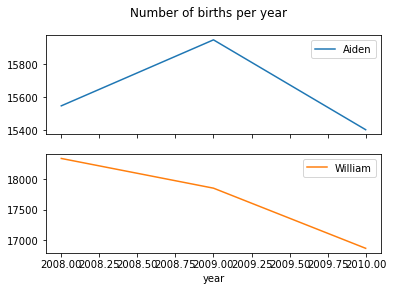

In [40]:
s = total_births[['Aiden','William']]
s.plot(subplots=True, title="Number of births per year");

#### Measuring the increase in naming diversity

In [18]:
boys = t[t.sex == 'M']
girls = t[t.sex == 'F']

In [42]:
boys

,name,sex,births,year,prop
20,Jacob,M,22507,2008,0.011075
21,Michael,M,20524,2008,0.010099
22,Ethan,M,20174,2008,0.009927
23,Joshua,M,19133,2008,0.009414
24,Daniel,M,18935,2008,0.009317
25,Alexander,M,18639,2008,0.009171
26,Anthony,M,18347,2008,0.009028
27,William,M,18337,2008,0.009023
28,Christopher,M,17876,2008,0.008796
29,Matthew,M,17526,2008,0.008624


In [43]:
dfboys = boys[boys.year == 2010]
dfboys

,name,sex,births,year,prop
100,Jacob,M,21875,2010,0.011523
101,Ethan,M,17866,2010,0.009411
102,Michael,M,17133,2010,0.009025
103,Jayden,M,17030,2010,0.008971
104,William,M,16870,2010,0.008887
105,Alexander,M,16634,2010,0.008762
106,Noah,M,16281,2010,0.008576
107,Daniel,M,15679,2010,0.008259
108,Aiden,M,15403,2010,0.008114
109,Anthony,M,15364,2010,0.008093


In [44]:
pc = dfboys.sort_values(by='prop', ascending=False).prop.cumsum() # pc: prop_cumsum
pc[:10]

100    0.011523
101    0.020934
102    0.029959
103    0.038930
104    0.047817
105    0.056579
106    0.065155
107    0.073414
108    0.081528
109    0.089621
Name: prop, dtype: float64

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دانشگاه شهید مدنی آذربایجان<br> برنامه نویسی پیشرفته با پایتون<br>امین گلزاری اسکوئی <br>1400-1401<br>
</div>
<a href="https://github.com/Amin-Golzari-Oskouei/Python-Programming-Course-Advanced-2021"> Codes and Projects (click here) </a>
<a href="https://drive.google.com/drive/folders/1Dx3v7fD1QBWL-MNP2hd7iIxaRbeALkkA">slides and videos (click here)</a>
</div>